In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [67]:
#Create a path to where your data is stored.
path= r'C:\Users\solom\Downloads\Machine Learning- Project'

In [68]:
df_weather = pd.read_csv(os.path.join(path, 'Manipulated Data', 'Weather_Data_Scaled.csv'), index_col = False)

In [69]:
df_weather.head()

,Unnamed: 0,ID,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [70]:
df_weather = df_weather.drop('Unnamed: 0', axis=1)

In [71]:
df_weather.head()

,ID,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [72]:
df_pleasant = pd.read_csv(os.path.join(path, 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [73]:
df_pleasant.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
#Reduce to just the temperature variables (excluding Gdansk, Stockholm Roma,Tours)
df = df_weather[['DATE', 'MONTH','BASEL_humidity','BASEL_precipitation','BASEL_sunshine',        
 'BELGRADE_humidity','BELGRADE_precipitation','BELGRADE_sunshine',
 'BUDAPEST_humidity', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine',
 'DEBILT_humidity','DEBILT_precipitation','DEBILT_sunshine',
 'DUSSELDORF_humidity','DUSSELDORF_precipitation','DUSSELDORF_sunshine',
 'HEATHROW_humidity','HEATHROW_precipitation','HEATHROW_sunshine',
 'KASSEL_humidity','KASSEL_precipitation','KASSEL_sunshine',
 'LJUBLJANA_humidity','LJUBLJANA_precipitation','LJUBLJANA_sunshine',
 'MAASTRICHT_humidity','MAASTRICHT_precipitation','MAASTRICHT_sunshine',
 'MADRID_humidity','MADRID_precipitation','MADRID_sunshine',
 'MUNCHENB_humidity','MUNCHENB_precipitation','MUNCHENB_sunshine',
 'OSLO_humidity','OSLO_precipitation','OSLO_sunshine',
 'SONNBLICK_humidity','SONNBLICK_precipitation','SONNBLICK_sunshine', 
 'VALENTIA_humidity','VALENTIA_precipitation','VALENTIA_sunshine']].copy()

In [75]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df.drop(['DATE', 'MONTH'], axis=1)
y = df_pleasant.drop(['DATE'], axis=1)

In [76]:
print(X.shape)
print(y.shape)

(22950, 42)
(22950, 15)


In [77]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [78]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 42)
(5738, 42)
(17212, 15)
(5738, 15)


In [79]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [80]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

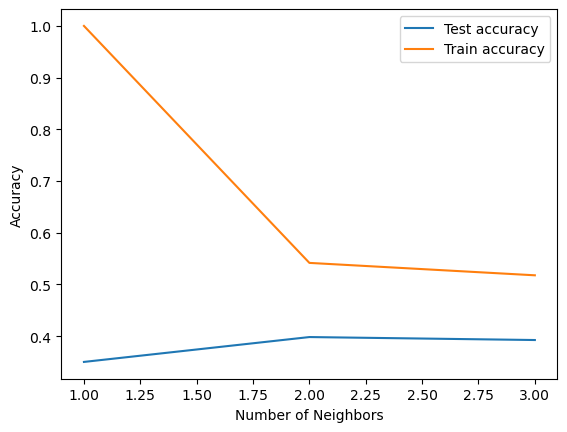

In [81]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

C:\Users\solom\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


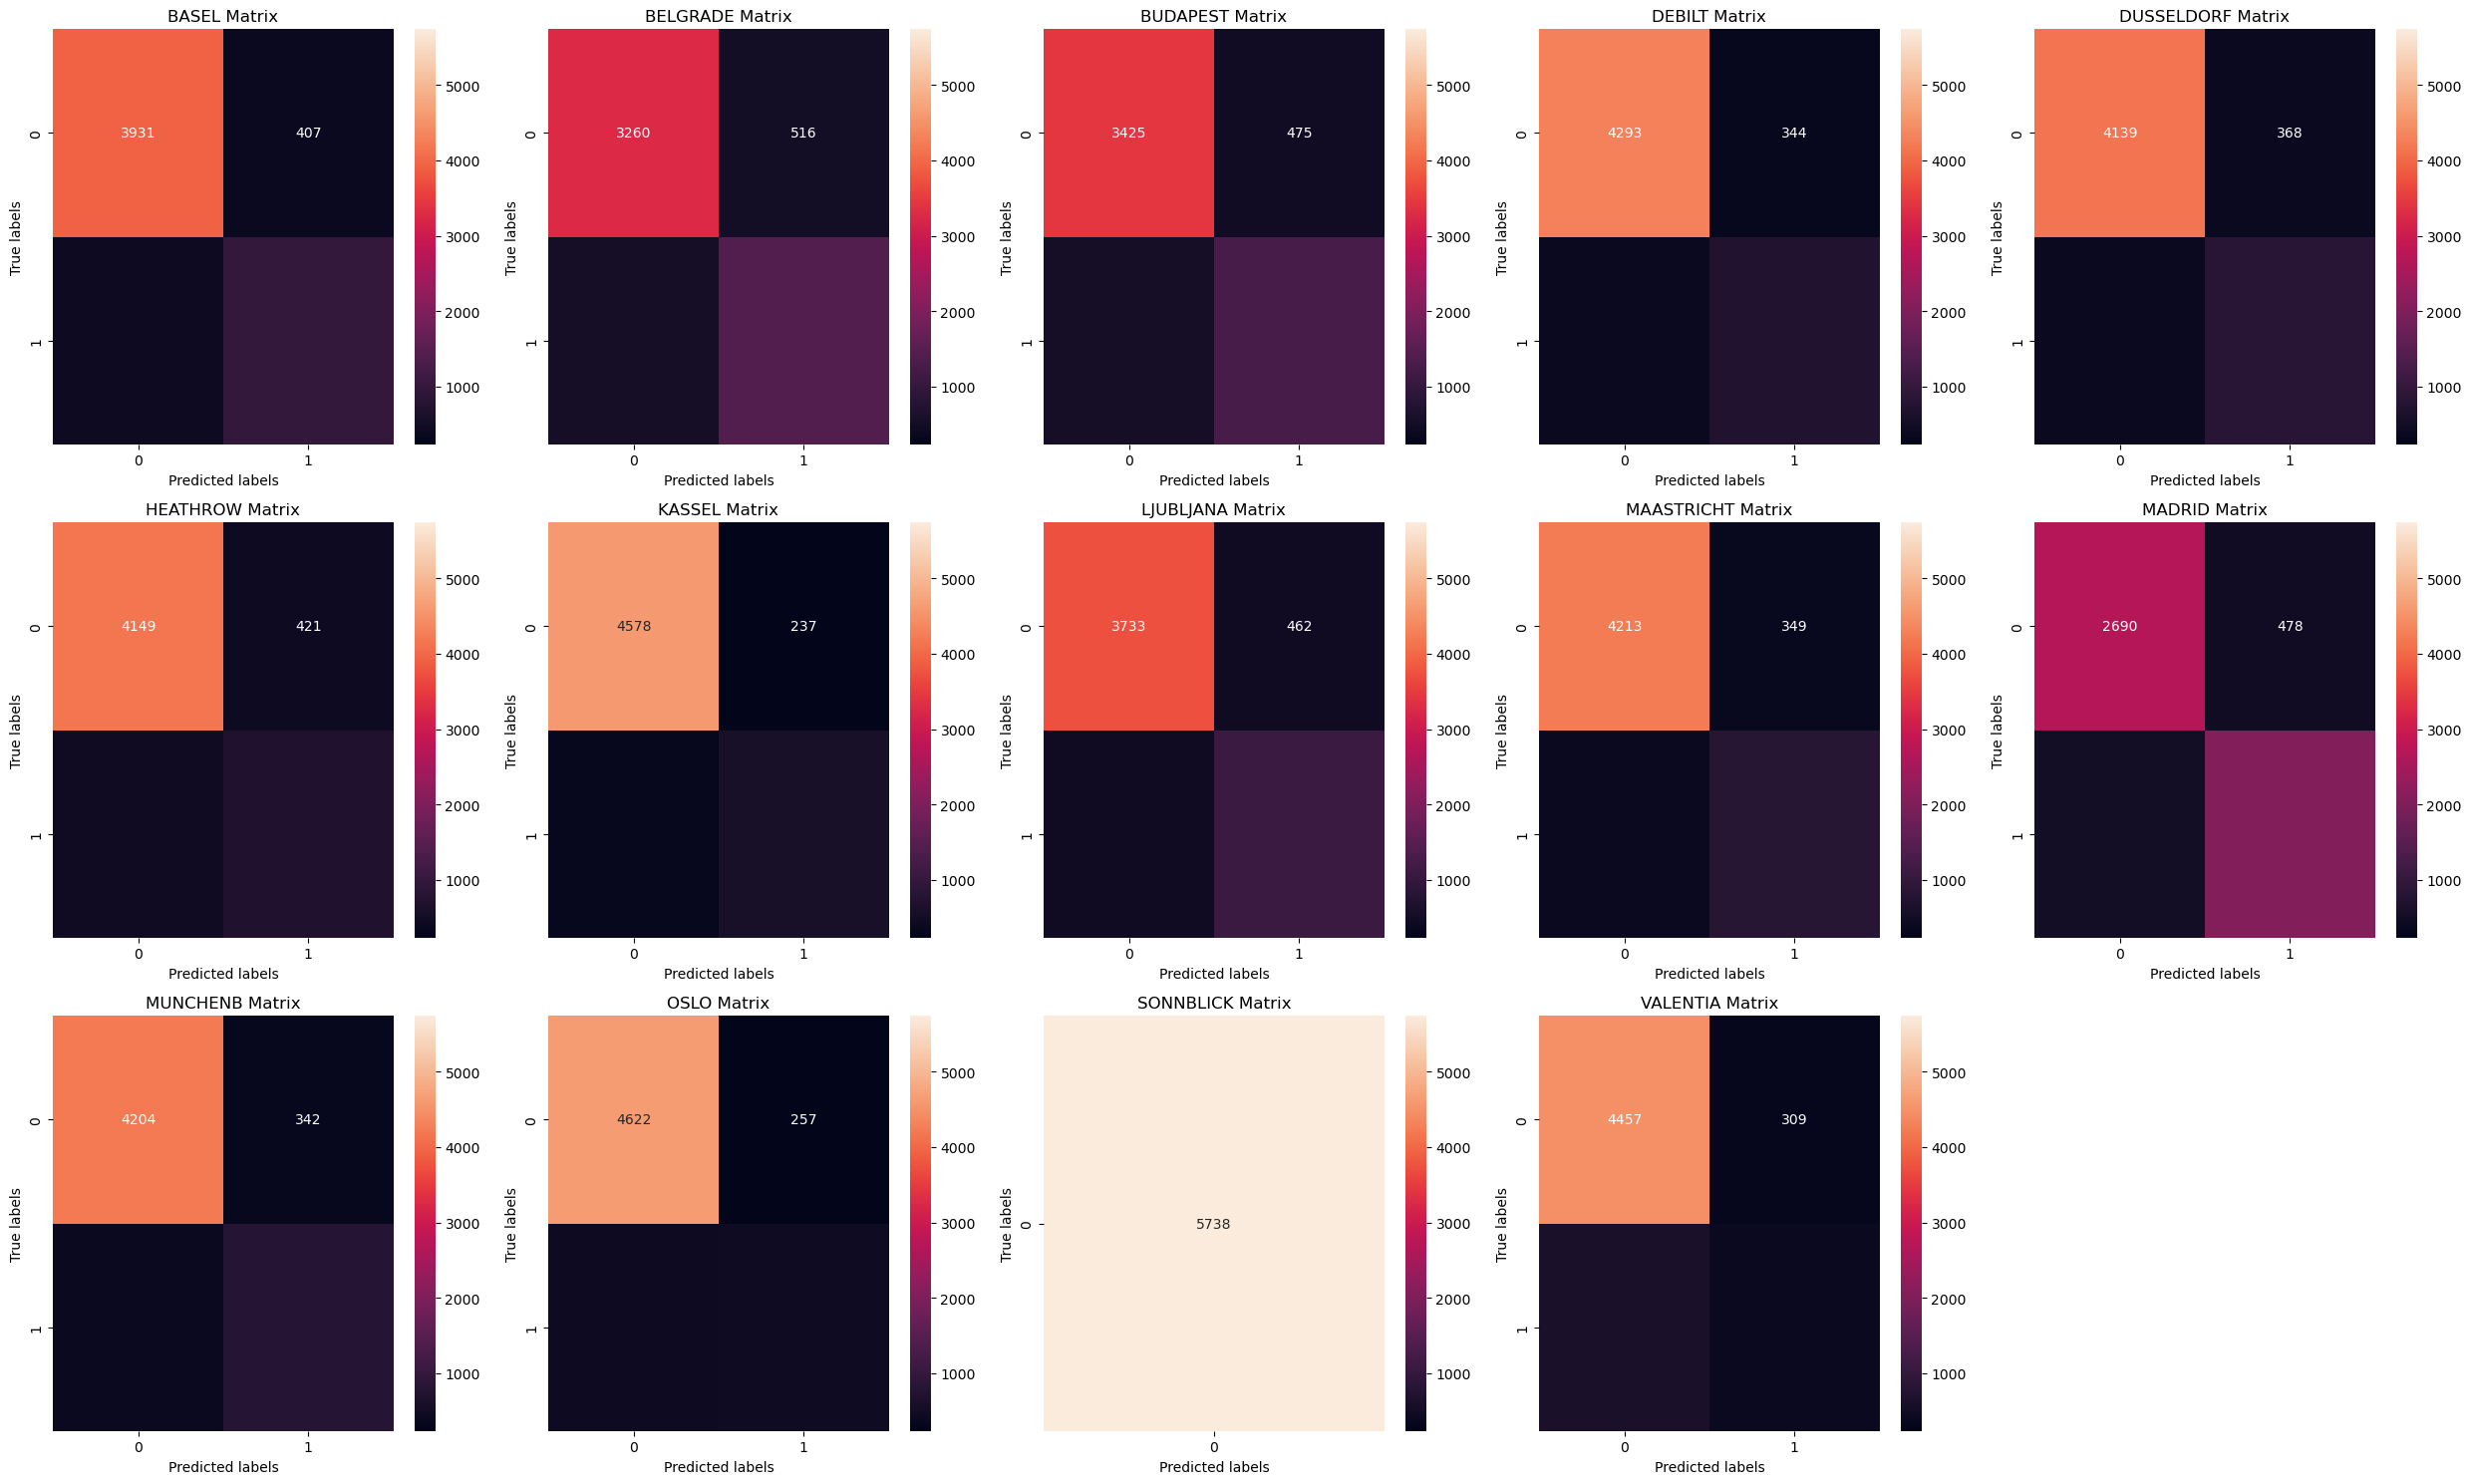

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Get unique locations
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()

# Number of plots
num_rows = 3
num_cols = 5
num_plots = num_rows * num_cols

# Initialize subplots
figure, ax = plt.subplots(num_rows, num_cols, figsize=(25, 15))

# Initialize a list to store confusion matrices
confusion_matrices = []

# Compute confusion matrices and store them
count = 0
for i in range(num_rows):
    for j in range(num_cols):
        if count < len(locations):
            name = locations[count]
            cm = confusion_matrix(y_test[:, count], y_pred[:, count])
            confusion_matrices.append(cm)
            count += 1
        else:
            ax[i, j].axis('off')  # Turn off unused subplots

# Determine global min and max for color scaling
vmax = max(cm.max() for cm in confusion_matrices) if confusion_matrices else 1
vmin = min(cm.min() for cm in confusion_matrices) if confusion_matrices else 0

# Plot confusion matrices
count = 0
for i in range(num_rows):
    for j in range(num_cols):
        if count < len(confusion_matrices):
            sns.heatmap(confusion_matrices[count], annot=True, fmt='g', ax=ax[i, j], vmin=vmin, vmax=vmax)
            ax[i, j].set_xlabel('Predicted labels')
            ax[i, j].set_ylabel('True labels') 
            ax[i, j].set_title(locations[count] + ' Matrix')
            count += 1
        else:
            ax[i, j].axis('off')  # Ensure unused subplots are turned off

plt.tight_layout()
plt.show()
